
<font color = maroon, size= 100px>    EARLY DIAGNOSIS OF DIABETES </font>

<img src='1702114374333.jpeg' style="width:1200px; height:200px"/>

#### Objective

##### Diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset.

#### About Dataset

** This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.    
** All patients here are females at least 21 years old of Pima Indian heritage.  

In [57]:
# impoprt libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [58]:
import warnings
warnings.simplefilter(action='ignore')

In [59]:
# import dataset

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Data Exploration 

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


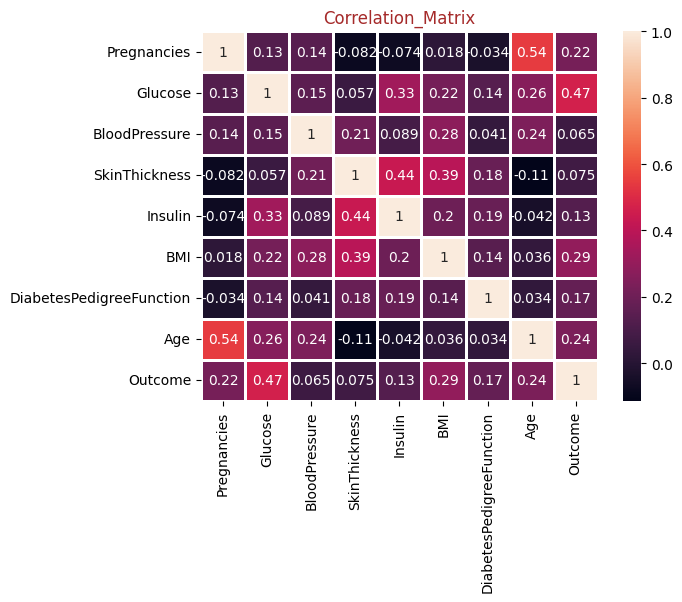

In [62]:
# Correlation Between variables

corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=1)
plt.title("Correlation_Matrix", c='brown')
plt.show()

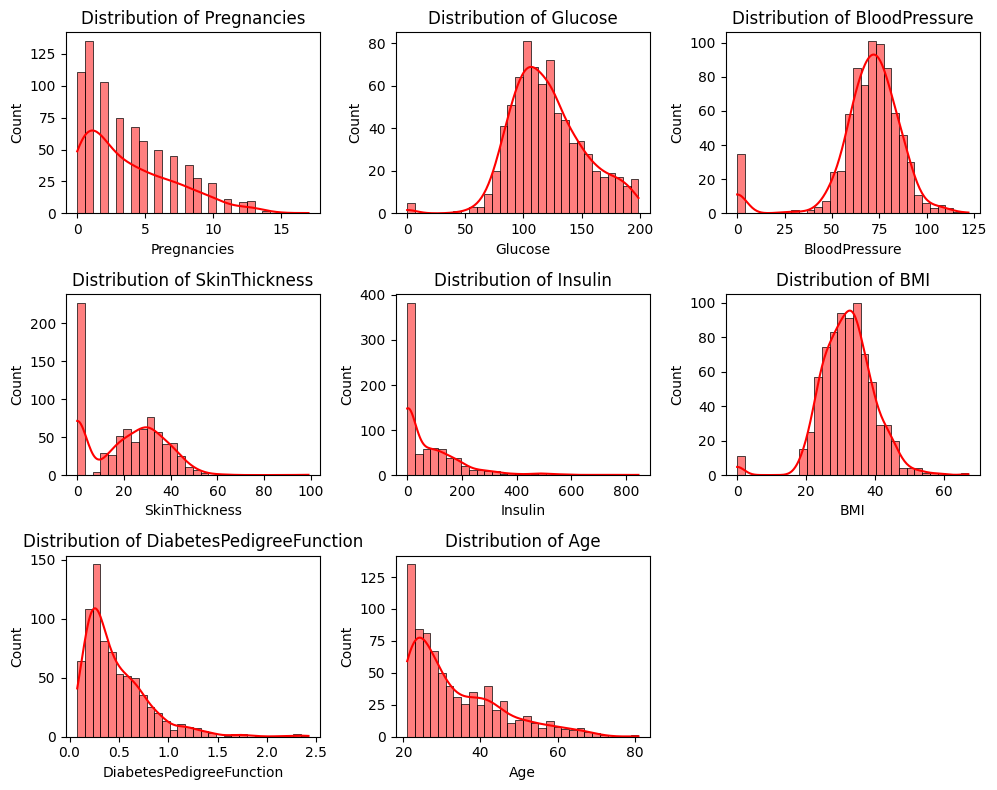

In [63]:
# Distribution of Variables
plt.figure(figsize=(10, 8))

for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=30, kde=True, color='red')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

### Data Preprocessing

In [64]:
# print all the unique values in each column

for i in df.columns:
    print(i, " : ", len(df[i].unique()))
    print("Unique_values : ", df[i].unique())
    print("\n")

Pregnancies  :  17
Unique_values :  [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]


Glucose  :  136
Unique_values :  [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]


BloodPressure  :  47
Unique_values :  [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]


SkinThickness  :  51
Unique_values :  [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31

In [65]:
# Check for blank values

print("Blank values:\n", (df=="").sum())

Blank values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [66]:
print(len(df[df.duplicated]))

0


In [67]:
# Replace zero with nan

columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
for column in columns_with_zeros:
    df[column] = df[column].replace(0, np.nan)

In [68]:
# replace nan values with median of each column

for column in columns_with_zeros:
    df[column].fillna(df[column].median(), inplace=True)

In [69]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### No duplicate values
##### No null values
##### No blank values
##### No zero values

##### Dependent Variable is Outcome

In [70]:
# independent and dependent variables
x = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [71]:
# Splitting dataset

X_train, X_test, Y_train, Y_test =train_test_split(x, y, test_size=0.2, random_state=42)

In [72]:
# Scaling
# create Scaler object
scaler = StandardScaler()

# Fit the scaler on the data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the data
X_test_scaled = scaler.transform(X_test)


X_train_scaled.shape, X_test_scaled.shape

((614, 8), (154, 8))

In [73]:
# Train a classification model

In [74]:
# Logistic Regression Model
LRmodel = LogisticRegression()

In [75]:
LRmodel.fit(X_train_scaled, Y_train)

LogisticRegression()

In [76]:
# Predictions on test set
LR_predicted = LRmodel.predict(X_test_scaled)
                               
# Measure evaluation

print("Accuracy Score :  ", accuracy_score(Y_test, LR_predicted), '\n')
LR_cm = confusion_matrix(Y_test, LR_predicted)
print("confusion_matrix : \n", LR_cm)
print("\n Classification Report :  \n", classification_report(Y_test, LR_predicted))

Accuracy Score :   0.7532467532467533 

confusion_matrix : 
 [[82 17]
 [21 34]]

 Classification Report :  
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



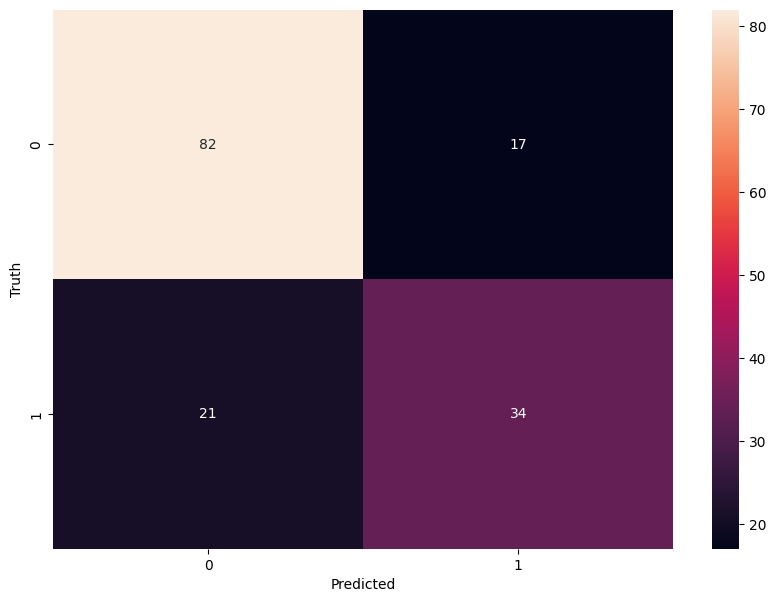

In [77]:
plt.figure(figsize = (10,7))
sns.heatmap(LR_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [78]:
# Random Forest Model
RFmodel = RandomForestClassifier(random_state=42)

In [79]:
RFmodel.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=42)

In [80]:
# Predictions on test set
RF_predicted = RFmodel.predict(X_test_scaled)
                               
# Measure evaluation

print("Accuracy Score :  ", accuracy_score(Y_test, RF_predicted), '\n')
RF_cm = confusion_matrix(Y_test, RF_predicted)
print("confusion_matrix : \n", RF_cm)
print("\n Classification Report :  \n", classification_report(Y_test, RF_predicted))

Accuracy Score :   0.7337662337662337 

confusion_matrix : 
 [[78 21]
 [20 35]]

 Classification Report :  
               precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [81]:
# Decision Tree Model
DTmodel = DecisionTreeClassifier()

In [82]:
DTmodel.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [83]:
# Predictions on test set
DT_predicted = DTmodel.predict(X_test_scaled)
                               
# Measure evaluation

print("Accuracy Score :  ", accuracy_score(Y_test, DT_predicted), '\n')
DT_cm = confusion_matrix(Y_test, DT_predicted)
print("confusion_matrix : \n", DT_cm)
print("\n Classification Report :  \n", classification_report(Y_test, DT_predicted))

Accuracy Score :   0.7207792207792207 

confusion_matrix : 
 [[76 23]
 [20 35]]

 Classification Report :  
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

